In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from tabulate import tabulate  # We use the tabulate moduel to create a table for our outputs


%load_ext autoreload
%autoreload 2

# Question 1

In [52]:
from HouseholdSpecializationModel1 import *


def HF_HM_ratio():

    results = [] # Result matrix

    for i, alpha in enumerate(alpha_values):
        
        row = [alpha] # This stores the values of each row in our result matrix.

        for j, sigma in enumerate(sigma_values):

            # model 
            model = HouseholdSpecializationModelClass(alpha=alpha, sigma=sigma)

            discrete_output = model.solve_discrete()

            optimalHM = discrete_output.HM
            optimalHF = discrete_output.HF

            ratio = optimalHF / optimalHM
            
            row.append(ratio) # Appends the calculated ratio value to the row list
            
        results.append(row) # Appends the row to the result matrix

    resultsTable = tabulate(results, headers=["Alpha"] + [f'Sigma = {sigma:.1f}' for sigma in sigma_values], floatfmt=".2f" )   

    return resultsTable  


alpha_values = [0.25, 0.5, 0.75]
sigma_values = [0.5, 1, 1.5] 

print(HF_HM_ratio())






  Alpha    Sigma = 0.5    Sigma = 1.0    Sigma = 1.5
-------  -------------  -------------  -------------
   0.25           0.55           0.31           0.21
   0.50           1.00           1.00           1.00
   0.75           1.83           3.25           4.67


# Question 2

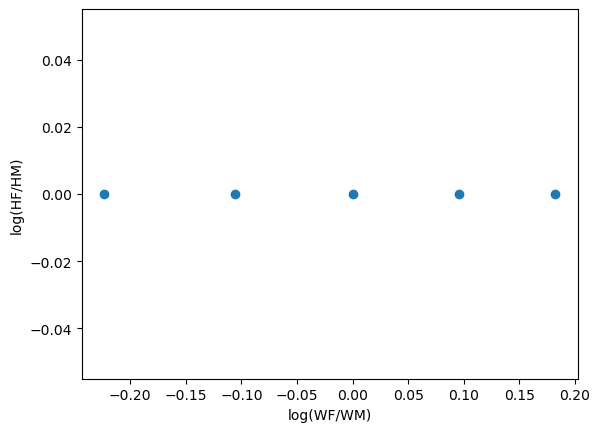

In [55]:
model = HouseholdSpecializationModelClass()

WM = 1
WF = model.par.wF_vec

logWFWH = np.log(WF / WM )

PlotDataDiscrete = model.solve_wF_vec(discrete=True)

HF = PlotDataDiscrete[3]
HM = PlotDataDiscrete[1]

logHFHM = np.log(HF / HM)

plt.scatter(logWFWH, logHFHM)

plt.xlabel("log(WF/WM)")
plt.ylabel("log(HF/HM)")

plt.show()

# Question 3

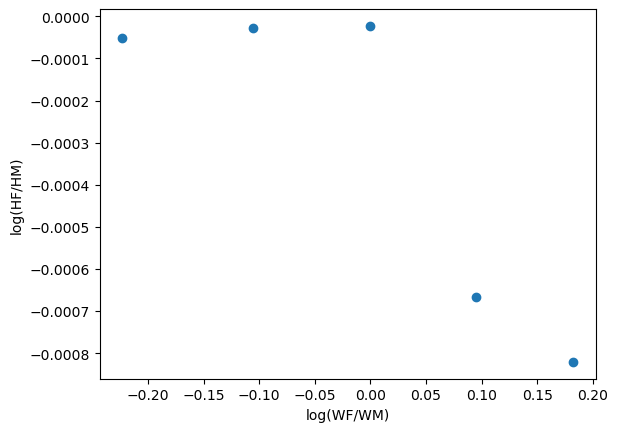

In [56]:
PlotDataContinuous = model.solve_wF_vec()

HF = PlotDataContinuous[3]
HM = PlotDataContinuous[1]

logHFHM = np.log(HF / HM)

plt.scatter(logWFWH, logHFHM)

plt.xlabel("log(WF/WM)")
plt.ylabel("log(HF/HM)")

plt.show()